# Data Visualization with Haberman Dataset 

1.Load haberman.csv into a pandas dataFrame.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman=pd.read_csv(r"C:\Users\Simran\Desktop\haberman.csv")
haberman
haberman.head()

,patient_age,operation_year,auxillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


for data points and feature
here 306 is datapoints and 4 is features

 2. column names in our dataset

In [0]:
haberman.tail()

,patient_age,operation_year,auxillary_nodes,Survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [0]:
print (haberman.columns)

Index(['patient_age', 'operation_year', 'auxillary_nodes', 'Survival_status'], dtype='object')


In [0]:
haberman["Survival_status"].value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

--------------------------------------------------------------------------------------------------
here 1 = the patient survived 5 years or longer 

     2 = the patient died within 5 year 
     
     so 225 patients have survived 5 years or longer
     
     and 81 patients have died within 5 year
----------------------------------------------------------------------------------     

=============================================================================================================================
### OBJECTIVE:

our objective is to predict whether patient can survive after 5 years or not based on thier patient_age,operation_year and auxillary_nodes.  

==============================================================================================================================

                                                2D SCATTER PLOT

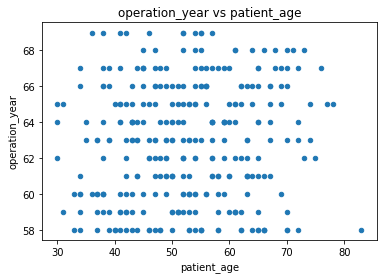

In [0]:
haberman.plot(kind='scatter', x='patient_age', y='operation_year');
plt.title('operation_year vs patient_age')
plt.show()

but from this it is difficult to analyze which plot belongs to patient_age and which plot belongs to operation_year
so for better classification we are going to use additonal functionality which is in bottom 

                                         PAIRPLOT

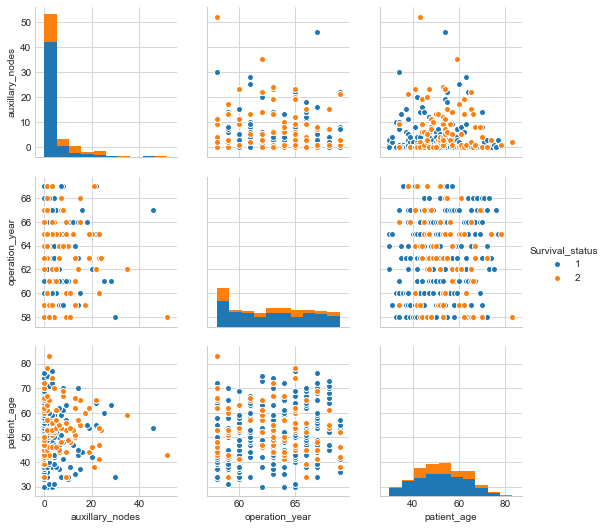

In [0]:
plt.close();
sns.set_style("whitegrid")
g = sns.pairplot(haberman,hue="Survival_status",vars=["auxillary_nodes", "operation_year","patient_age"]);
plt.show()

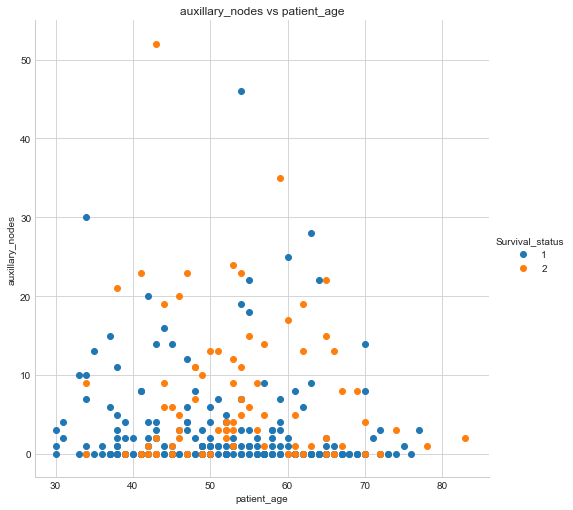

In [0]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_status", size=7) \
   .map(plt.scatter, "patient_age", "auxillary_nodes") \
   .add_legend();
plt.title('auxillary_nodes vs patient_age')
plt.show();

from this we can conclude that patients with 0 auxillary_nodes are more likley to survive

patients older than 50 and auxillary_nodes greater then 10 more are likey to die within 5 years




# PROBABILITY DENSITY FUNCTION

 ### 1. PDF FOR auxillary_nodes

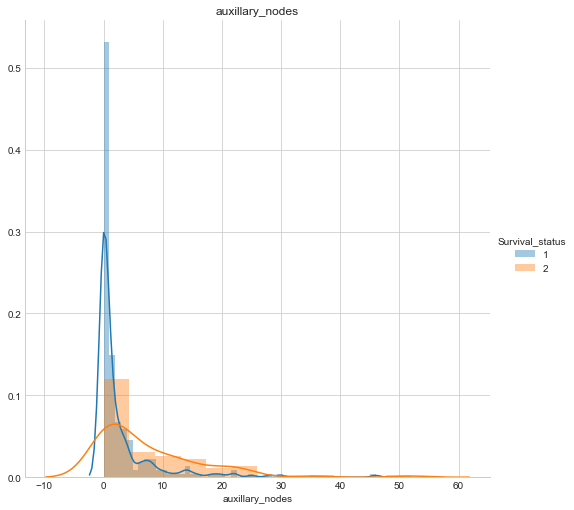

In [0]:
import warnings
warnings.filterwarnings('ignore')


sns.FacetGrid(haberman, hue="Survival_status", size=7) \
   .map(sns.distplot, "auxillary_nodes") \
   .add_legend();

plt.title('auxillary_nodes')
plt.show();

from this pdf we can say that patients having 0 as their auxillary nodes are more likely to survive.



### 2. pdf for patient_age


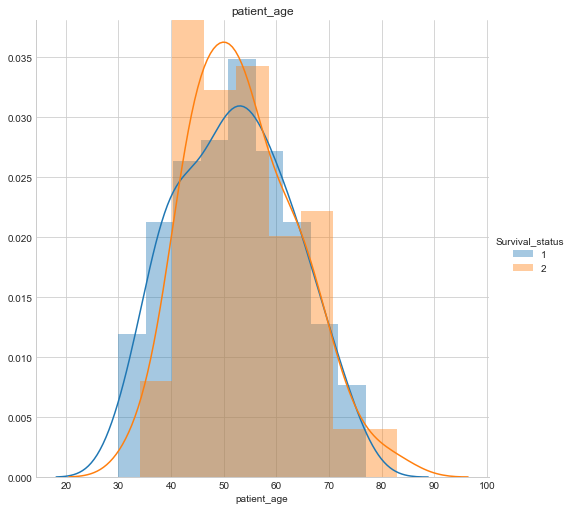

In [0]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(haberman, hue="Survival_status", size=7) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.title('patient_age')
plt.show();

it is also overlapping and
from this pdf we can conclude that patient age around 40 to 70 they are more likely to die within 5 years


### 3. pdf for operation_year




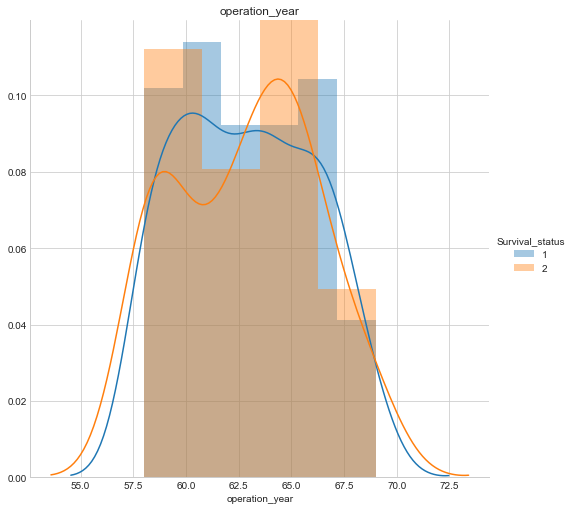

In [0]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(haberman, hue="Survival_status", size=7) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.title('operation_year')
plt.show();

firslty it is overlapping and
from this we can say that at year 1960 and 1965 there is more chance of die within 5 year


# CUMULATIVE DISTRIBUTION FUNCTION
    


[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


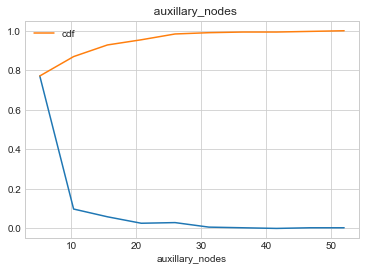

In [0]:
counts, bin_edges = np.histogram(haberman['auxillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf , label="cdf")
plt.xlabel("auxillary_nodes")
plt.legend()
plt.title("  auxillary_nodes")
plt.show();



since from above pdf we can conclude most important feature for classification is auxillary_nodes we will be performing 
cdf for auxillary_nodes

    
### Mean, Variance, Std-deviation,  


In [0]:
print("Means:")
print(np.mean(haberman["auxillary_nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haberman["auxillary_nodes"],300)));
print(np.mean(haberman["auxillary_nodes"]))
print(np.mean(haberman["auxillary_nodes"]))

print("\nStd-dev:");
print(np.std(haberman["auxillary_nodes"]))
print(np.std(haberman["auxillary_nodes"]))
print(np.std(haberman["auxillary_nodes"]))


Means:
4.026143790849673
4.990228013029316
4.026143790849673
4.026143790849673

Std-dev:
7.177896092811152
7.177896092811152
7.177896092811152


if we add outlier...in mean thier is huge difference in mean i.e 4.02 and 4.99
and the drawback is 1 outlier can corrupt the whole number .and for better results we will be using median.

                                            
    
    
### Median, Quantiles, Percentiles, IQR.




In [0]:
print("\nMedians:")
print(np.median(haberman["auxillary_nodes"]))
#Median with an outlier
print(np.median(np.append(haberman["auxillary_nodes"],300)));
print(np.median(haberman["auxillary_nodes"]))
print(np.median(haberman["auxillary_nodes"]))


print("\nQuantiles:")
print(np.percentile(haberman["auxillary_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman["auxillary_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman["auxillary_nodes"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman["auxillary_nodes"],90))
print(np.percentile(haberman["auxillary_nodes"],90))
print(np.percentile(haberman["auxillary_nodes"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman["auxillary_nodes"]))
print(robust.mad(haberman["auxillary_nodes"]))
print(robust.mad(haberman["auxillary_nodes"]))



Medians:
1.0
1.0
1.0
1.0

Quantiles:
[0. 0. 1. 4.]
[0. 0. 1. 4.]
[0. 0. 1. 4.]

90th Percentiles:
13.0
13.0
13.0

Median Absolute Deviation
1.482602218505602
1.482602218505602
1.482602218505602


the advantage of using median is through outliers the median is still same.

## BOXPLOT

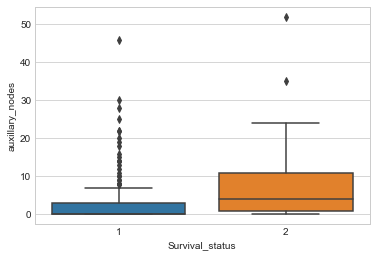

In [0]:
sns.boxplot(x='Survival_status',y='auxillary_nodes', data=haberman)
plt.show()

From this we can predict that as auxillary_nodes are around 10.....

75% of patients will die

50% of patient will die when auxillary node is at around 4 approx

25% of patient will die when auxillary node is at around 1 approx

======================================================================================================================

 ## VIOLINPLOT

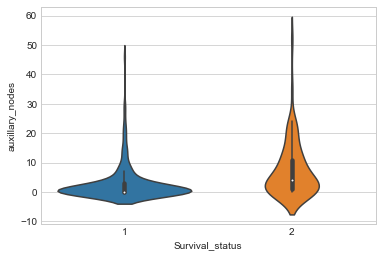

In [0]:
sns.violinplot(x='Survival_status',y='auxillary_nodes', data=haberman)
plt.show()

here for patients that survived within 5 years or more-

0 as auxillary nodes wil be 25%   

8 as auxillary node will be 75% percentile of patients
    
AND

here for patients that die within 5 year

0  will be 25%

12 will be 75%

around 4 will be 50%

## OBSERVATIONS

    
1.auxillary node is an important feature for classification of patient.
        
 In this exercise i have assume 

              1-patients that live 5 years or more
                                      
              2-patients that die within 5 year.
=======================================================================================================================            
            
2.age is also an important feature because through graph we have seeen that patient whose age is >=40 showing die.

======================================================================================================================

3.from this dataset we can see that most patient  age  range from 40 to 65.

======================================================================================================================
4.Patients  who have 0 auxillary_nodes are more likely to survive

======================================================================================================================
5.from pdf of operation_year we can say that at year 1960 and 1965 there is more chance of die within 5 year.

=====================================================================================================================
6. for boxplot



from this we can predict that as auxillary_nodes are around 10.....

                       75% of patients will die
    
                       50% of patient will die when auxillary node is at around 4 approx
        
                       25% of patient will die when auxillary node is at around 1 approx.
            
            
when auxillary node is 0 -25% of patient will survive

when auxillary node is 4- 75% of patient will survive.

======================================================================================================================


7. for violin plot

patients that survived within 5 years or more- 0 as auxillary nodes wil be 25%

                                               8 as auxillary node will be 75% percentile of patients.
    
    
here for patients that die within 5 year- 0  will be 25%
                                          12 will be 75%
                                          around 4 will be 50%

=========================================================================================================================


8.  patient age around 40 to 70 they are more likely to die within 5 years.